In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import time, datetime
import numpy as np
import matplotlib.pyplot as plt 
import math
import pickle
import bokeh
from bokeh.models import ColumnDataSource, FactorRange, Legend
from bokeh.io import output_file, show, output_notebook
from bokeh.plotting import figure
from collections import OrderedDict, Counter
import seaborn as sns
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
from folium.plugins import DualMap

# Final Project: Motor Vehicle Collisions - Crashes of New York City#
## Introduction and Motivation ##
The Motor Vehicle Collisions crash table contains details on the crash event. Each row represents a crash event. The Motor Vehicle Collisions data tables contain information from all police reported motor vehicle collisions in NYC.<a href="https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95" >[1]</a> We found this data-set a good fit for our final project, because it has some overlapping features with the Police Department Incident Reports data-set we have worked on a lot, so we can apply many methods and techniques we learned in the exercises. By the way, there is also some other interesting features we can explore with our own imaginations. In addition to this, all of us are quite concerned about the public safety and find it interesting to learn more about traffic problems in big cities such as New York City. We would like to provide readers some insights about when, where and why motor vehicle collisions happen in NYC, the impact of these terrible collisions and the approaches we can do to protect ourselves from danger.

Apart from the basic data analysis to help our readers to get an overview of the data-set, we have our story telling focus on the cyclists perspective. As all of us enjoy cycling a lot and so do many living in Denmark, we would like to investigate the severeness of motor vehicle collisions have on the cyclists and to see the trend and offer possible suggestions. We also included other data-sets such as 'Manhattan Bike Counts 2005-2015' to do investigations in depth. 

In order to ensure the viewers of our website have a pleasant experience, we decided to use $\textbf{Interactive Slideshow}$ as our genre. Our goal is to make our deliverables both author-driven and reader-driven. For example, the website will contain messages from the author side to bring some insights to readers. This is beneficial for readers to understand the story behind visualizations. To not make our readers bored, we encourage them to explore graphs with interactive legends and zoom in maps to see more details.  

## Basic Stats##

The raw data-set consists of 1407835(1407831 with at least one variable available) rows and 29 variables/columns. The motor vehicle collisions were recorded from 2012 to 2021 as we downloaded the latest version. Cases recorded distribute in 5 boroughs in NYC and they are Bronx, Brooklyn, Manhattan, Queens and Staten Island. We printed some basic stats in the following cells. 

We had our distribution of collision cases by years, months, days, hours and minutes on one graph. The graph is with 5 different available time units. We neglected other time units and focused on only one specific time unit at each time. This data pre-processing and cleaning work enabled us to investigate 5 unique trends and think more about, for example, why collisions boosted in some specific years, hours and minutes further. We also had our distribution of different boroughs and different types of people injured/killed.

It is possible that more than two vehicles enrolled in one collision. Actually the data-set mostly reported 5 vehicles in one collision. We are curious about will the contributing factors and vehicle types vary from different vehicles. Therefore, we made 5 vehicles as our interactive legends. As there is many different contributing factors and vehicle types reported, we only took the top5 and top10 respectively. The data cleaning is done for top5 and top10 can sufficiently report the mainstream and we are not care about some very rare and extreme cases. We also normalized the value for a pleasant visualiation and comparison. The total number of cases for 5 vehicles is quite different because most of crashes only involved two or three vehicles. Instead of taking specific value, we took the probability of the distribution for each vehicle in the legend.   

In [2]:
#import csv file of the target data-set
df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv")

#we want to have access to dataframe.dt.year/month/day/hour/minute
#change crash date format into the date format of standard dataframe
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'].astype(str), format='%m/%d/%Y', errors='coerce')
#change crash time format into the time format of standard dataframe
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'].astype(str), format='%H:%M')

#access the number of rows
print("The number of rows of the raw data-set is: {}".format(len(df)))
print("The number of rows of the data-set without rows containing no information is: {}"
      .format(len(df.dropna(how='all'))))
#access the number of variables/columns
print("The number of variables/columns of the data-set is: {}".format(len(df.columns)))
#access all variables
print("The variables of the data-set are: {}".format(np.array(df.columns)))

The number of rows of the raw data-set is: 1407835
The number of rows of the data-set without rows containing no information is: 1407831
The number of variables/columns of the data-set is: 29
The variables of the data-set are: ['CRASH DATE' 'CRASH TIME' 'BOROUGH' 'ZIP CODE' 'LATITUDE' 'LONGITUDE'
 'LOCATION' 'ON STREET NAME' 'CROSS STREET NAME' 'OFF STREET NAME'
 'NUMBER OF PERSONS INJURED' 'NUMBER OF PERSONS KILLED'
 'NUMBER OF PEDESTRIANS INJURED' 'NUMBER OF PEDESTRIANS KILLED'
 'NUMBER OF CYCLIST INJURED' 'NUMBER OF CYCLIST KILLED'
 'NUMBER OF MOTORIST INJURED' 'NUMBER OF MOTORIST KILLED'
 'CONTRIBUTING FACTOR VEHICLE 1' 'CONTRIBUTING FACTOR VEHICLE 2'
 'CONTRIBUTING FACTOR VEHICLE 3' 'CONTRIBUTING FACTOR VEHICLE 4'
 'CONTRIBUTING FACTOR VEHICLE 5' 'COLLISION_ID' 'VEHICLE TYPE CODE 1'
 'VEHICLE TYPE CODE 2' 'VEHICLE TYPE CODE 3' 'VEHICLE TYPE CODE 4'
 'VEHICLE TYPE CODE 5']


In [3]:
#access all years included in the data-set and sort them by numbers
years = np.array(df['CRASH DATE'].dt.year.drop_duplicates().dropna().sort_values()).astype(int)
print("Years involved in the motor vehicle collisions are: {}".format(years))
#access all boroughs included in the data-set and sort them by alphabets
boroughs = np.array(df['BOROUGH'].drop_duplicates().dropna().sort_values())
print("Boroughs involved in the motor vehicle collisions are: {}".format(boroughs))

Years involved in the motor vehicle collisions are: [2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
Boroughs involved in the motor vehicle collisions are: ['BRONX' 'BROOKLYN' 'MANHATTAN' 'QUEENS' 'STATEN ISLAND']


In [4]:
#enable the label for months
months = np.array(df['CRASH DATE'].dt.month.drop_duplicates().dropna().sort_values()).astype(int)
#enable the label for days
days = np.array(df['CRASH DATE'].dt.day.drop_duplicates().dropna().sort_values()).astype(int)
#enable the label for hours
hours = np.array(df['CRASH TIME'].dt.hour.drop_duplicates().dropna().sort_values()).astype(int)
#enable the label for minutes
minutes = np.array(df['CRASH TIME'].dt.minute.drop_duplicates().dropna().sort_values()).astype(int)

In [5]:
df = df.dropna(how='all') #drop rows containing no information

count_year = df['CRASH DATE'].dt.year.value_counts().sort_index()
count_month = df['CRASH DATE'].dt.month.value_counts().sort_index()
count_day = df['CRASH DATE'].dt.day.value_counts().sort_index()
count_hour = df['CRASH TIME'].dt.hour.value_counts().sort_index()
count_minute = df['CRASH TIME'].dt.minute.value_counts().sort_index()

count_borough = df['BOROUGH'].value_counts().sort_index()

person_injured = df['NUMBER OF PERSONS INJURED'].value_counts().sort_index()
person_killed = df['NUMBER OF PERSONS KILLED'].value_counts().sort_index()
pedestrian_injured = df['NUMBER OF PEDESTRIANS INJURED'].value_counts().sort_index()
pedestrian_killed = df['NUMBER OF PEDESTRIANS KILLED'].value_counts().sort_index()
cyclist_injured = df['NUMBER OF CYCLIST INJURED'].value_counts().sort_index()
cyclist_killed = df['NUMBER OF CYCLIST KILLED'].value_counts().sort_index()
motorist_injured = df['NUMBER OF MOTORIST INJURED'].value_counts().sort_index()
motorist_killed = df['NUMBER OF MOTORIST KILLED'].value_counts().sort_index()

### Number of motor vehicle collisions by different time units###
We can conclude that there is no significant difference between months and days regarding the number of cases. There is fewer cases on the 31$^{\text{st}}$ because not all months have 31 days. There is a bit fewer cases happening in April, May and June. Most of the motor collisions were recorded between 2015 and 2019. Most of the cases occurred in the afternoon, between 14 and 18, with maximum in 16 and 17. At these time intervals, most of people are off work and rush to go back home, causing intense pressure of the traffic and that can be the reason for the boosting of motor collisions. We found it interesting that minutes recorded are mostly round numbers, for example, 0, 5, 10, 15... Police officers might keep the habit of keeping round minutes and that can correspond to people's common habits of telling time. 

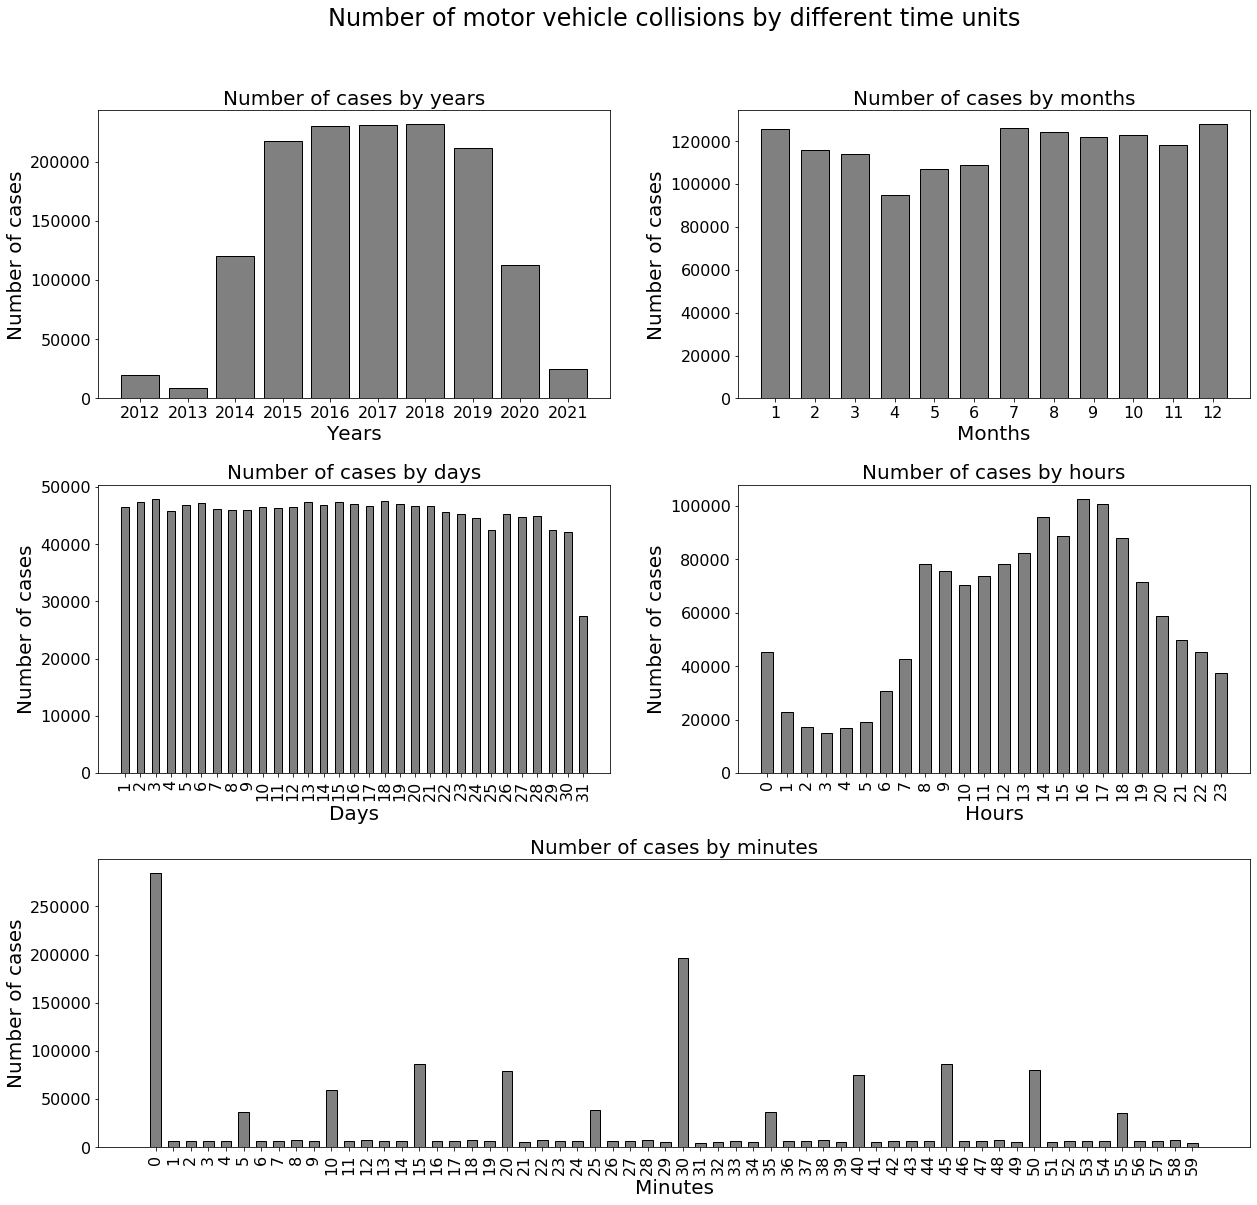

In [6]:
plt.figure(figsize=(20,18), constrained_layout=True) #dpi can be added to increase the clarity
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.25, hspace=0.3)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
ax1 = plt.subplot(3,2,1)
ax2 = plt.subplot(3,2,2)
ax3 = plt.subplot(3,2,3)
ax4 = plt.subplot(3,2,4)
ax5 = plt.subplot(3,1,3)
axes = [ax1, ax2, ax3, ax4, ax5]

axes[0].bar(count_year.index, count_year.values, width=0.8, color='grey', edgecolor='black')
axes[0].xaxis.set_tick_params(labelsize=16)
axes[0].yaxis.set_tick_params(labelsize=16)
axes[0].xaxis.set_ticks(np.arange(years[0], years[-1]+1, 1))
axes[0].xaxis.set_label_text('Years')
axes[0].yaxis.set_label_text('Number of cases')
axes[0].title.set_text('Number of cases by years')

axes[1].bar(count_month.index, count_month.values, width=0.7, color='grey', edgecolor='black')
axes[1].xaxis.set_tick_params(labelsize=16)
axes[1].yaxis.set_tick_params(labelsize=16)
axes[1].xaxis.set_ticks(np.arange(months[0], months[-1]+1, 1))
axes[1].xaxis.set_label_text('Months')
axes[1].yaxis.set_label_text('Number of cases')
axes[1].title.set_text('Number of cases by months')

axes[2].bar(count_day.index, count_day.values, width=0.5, color='grey', edgecolor='black')
axes[2].tick_params(axis='x', rotation=90)
axes[2].xaxis.set_tick_params(labelsize=16)
axes[2].yaxis.set_tick_params(labelsize=16)
axes[2].xaxis.set_ticks(np.arange(days[0], days[-1]+1, 1))
axes[2].xaxis.set_label_text('Days')
axes[2].yaxis.set_label_text('Number of cases')
axes[2].title.set_text('Number of cases by days')

axes[3].bar(count_hour.index, count_hour.values, width=0.6, color='grey', edgecolor='black')
axes[3].tick_params(axis='x', rotation=90)
axes[3].xaxis.set_tick_params(labelsize=16)
axes[3].yaxis.set_tick_params(labelsize=16)
axes[3].xaxis.set_ticks(np.arange(hours[0], hours[-1]+1, 1))
axes[3].xaxis.set_label_text('Hours')
axes[3].yaxis.set_label_text('Number of cases')
axes[3].title.set_text('Number of cases by hours')

axes[4].bar(count_minute.index, count_minute.values, width=0.6, color='grey', edgecolor='black')
axes[4].tick_params(axis='x', rotation=90)
axes[4].xaxis.set_tick_params(labelsize=16)
axes[4].yaxis.set_tick_params(labelsize=16)
axes[4].xaxis.set_ticks(np.arange(minutes[0], minutes[-1]+1, 1))
axes[4].xaxis.set_label_text('Minutes')
axes[4].yaxis.set_label_text('Number of cases')
axes[4].title.set_text('Number of cases by minutes')

plt.suptitle('Number of motor vehicle collisions by different time units', fontsize=24)
plt.show()

### Number of motor vehicle collisions by different boroughs ###
The ranking of boroughs by the number of cases is Brooklyn, Queens, Manhattan, Bronx and Staten Island, where Bronx and Staten Island have far less cases than other boroughs. 

<BarContainer object of 5 artists>

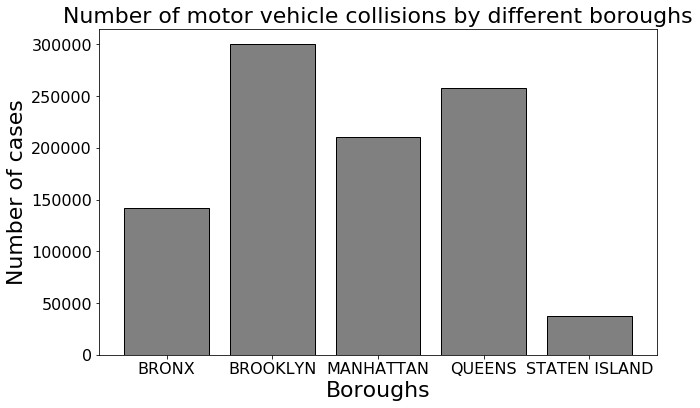

In [7]:
#cases by different boroughs in NYC
plt.figure(figsize=(10,6)) #dpi can be added to increase the clarity
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Boroughs", fontsize=22)
plt.ylabel("Number of cases", fontsize=22)
plt.title("Number of motor vehicle collisions by different boroughs", fontsize=22)
plt.bar(count_borough.index, count_borough.values, width=0.8, color='grey', edgecolor='black')

### Number of motor vehicle collisions by injured/killed ###
By looking at the figure for number of motor vehicle collisions by injured/killed, we can conclude that most of the motor vehicle collisions are small conflicts, which did not have people on road injured or killed. Motorists are more likely to get injured/killed in collisions than others, because they are with much faster speed than cyclists and pedestrians. 

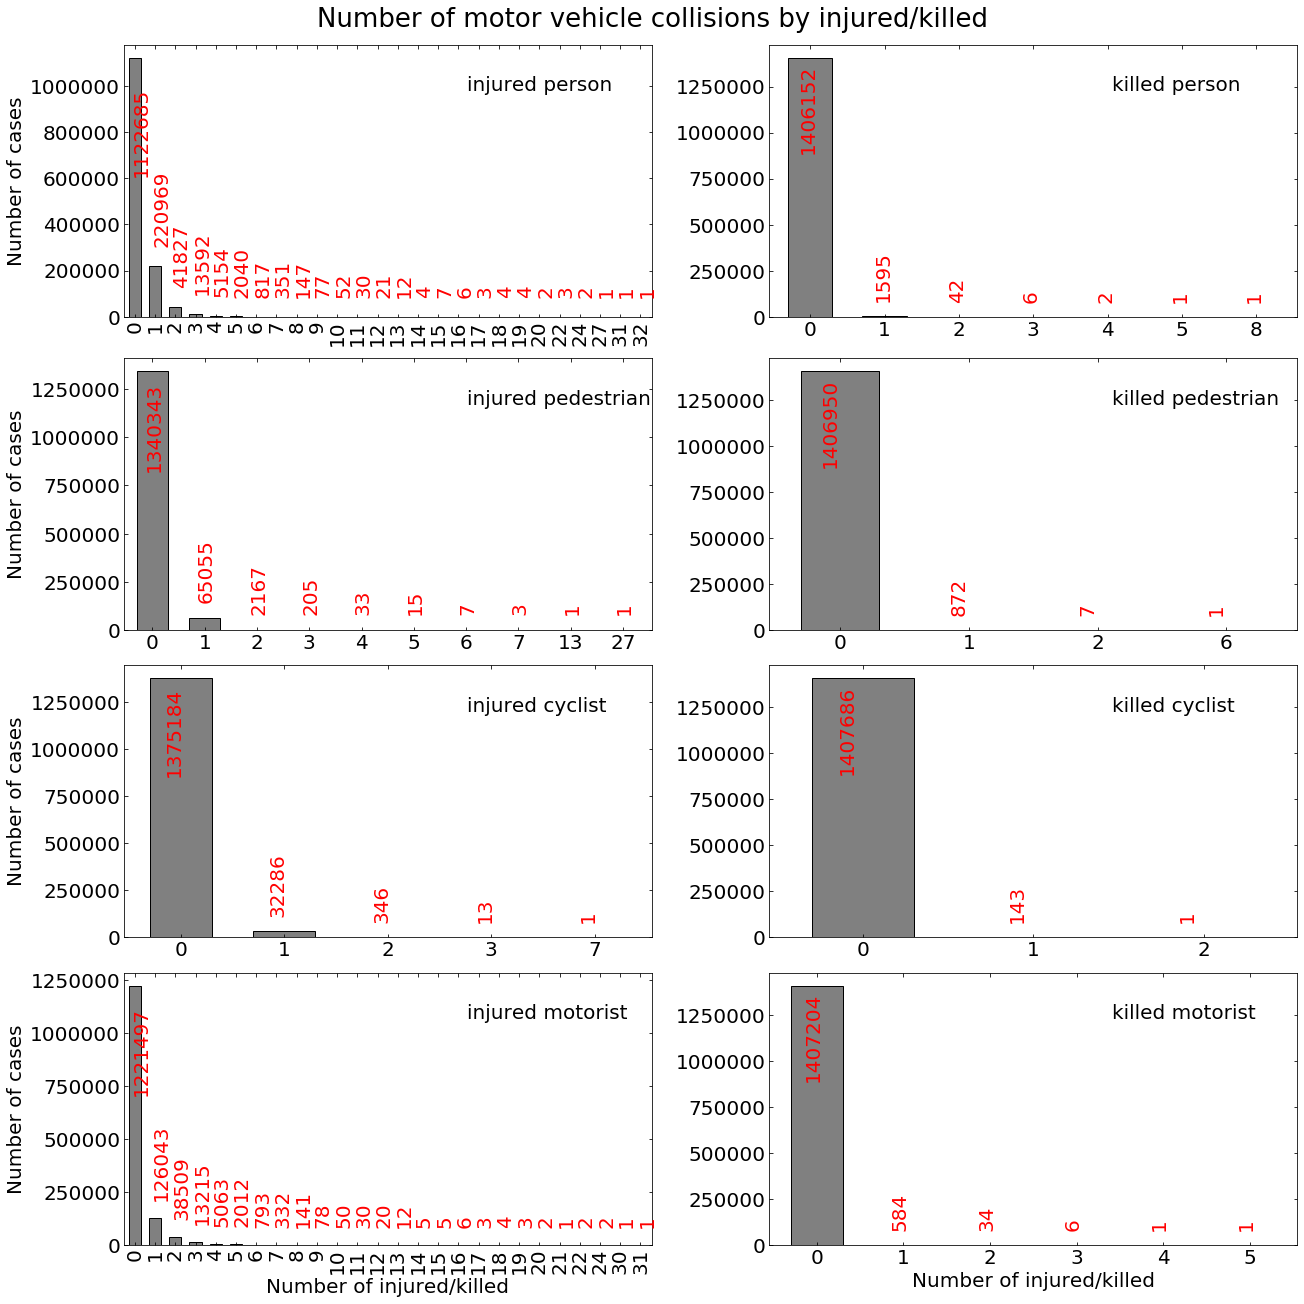

In [8]:
#create a dictionary for different types of injured and killed
ik_dic = {'ik' : [person_injured, person_killed, pedestrian_injured, pedestrian_killed,
                 cyclist_injured, cyclist_killed, motorist_injured, motorist_killed],
         'label' : ["injured person", "killed person", "injured pedestrian", "killed pedestrian",
                   "injured cyclist", "killed cyclist", "injured motorist", "killed motorist"]}

#the number of injured and killed
fig, axes = plt.subplots(4, 2, figsize=(18,18), constrained_layout=True) #dpi can be added to increase the clarity
for ik, label, ax in zip(ik_dic['ik'], ik_dic['label'], axes.flat):
    ik.index = ik.index.astype(int) #make the index without any decimals
    ik.plot(kind='bar', ax=ax, color='grey', edgecolor='black', width=0.6)
    ax.tick_params(right=True, top=True, direction="in", labelrotation = 0, labelsize=20)
    ax.text(0.65, 0.85, label, fontsize=20, horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    values = np.array(ik.values)
    for i, v in enumerate(values):
        if i == 0:
            ax.text(i-0.15, v-500000, str(v), fontsize=20, color='red', rotation=90)
        else:
            ax.text(i-0.15, v+100000, str(v), fontsize=20, color='red', rotation=90)
axes[0, 0].tick_params(axis='x', right=True, top=True, direction="in", labelrotation = 90, labelsize=20)
axes[3, 0].tick_params(axis='x', right=True, top=True, direction="in", labelrotation = 90, labelsize=20)
plt.setp(axes[-1, :], xlabel='Number of injured/killed')
plt.setp(axes[:, 0], ylabel='Number of cases')
fig.suptitle('Number of motor vehicle collisions by injured/killed', fontsize=26)
plt.show()

In [9]:
#interactive legends with Bokeh for contributing factors of different vehicles envolved

#count the top 5 contributing factor of different vehicles in each collision
#in most of the cases, the contributing factor is not recorded, so we eliminate the one counted most("Unspecified")
v1_factor = df['CONTRIBUTING FACTOR VEHICLE 1'].str.lower().value_counts()[1:6]
v2_factor = df['CONTRIBUTING FACTOR VEHICLE 2'].str.lower().value_counts()[1:6]
v3_factor = df['CONTRIBUTING FACTOR VEHICLE 3'].str.lower().value_counts()[1:6]
v4_factor = df['CONTRIBUTING FACTOR VEHICLE 4'].str.lower().value_counts()[1:6]
v5_factor = df['CONTRIBUTING FACTOR VEHICLE 5'].str.lower().value_counts()[1:6]
lsFactor = [v1_factor, v2_factor, v3_factor, v4_factor, v5_factor]

factor = v1_factor.index.values.tolist() + v2_factor.index.values.tolist() + v3_factor.index.values.tolist() + v4_factor.index.values.tolist() + v5_factor.index.values.tolist()
res = [] #remove duplicated factors 
for i in factor:
    if i not in res:
        res.append(i)

vehicle = ['Vehicle 1', 'Vehicle 2', 'Vehicle 3', 'Vehicle 4', 'Vehicle 5']

byFactor = pd.DataFrame(index=res, columns=vehicle)
for i in range(len(lsFactor)):
    for j in range(np.shape(byFactor.values)[1]):
        for z in range(np.shape(byFactor.values)[0]):
            if lsFactor[i].index.values.tolist()[j] == byFactor[vehicle[i]].index.values.tolist()[z]:
                byFactor[vehicle[i]].values[z] = lsFactor[i].values[j]

for col in range(np.shape(byFactor.values)[1]):
    byFactor[vehicle[col]] = byFactor[vehicle[col]].fillna(0)
    byFactor[vehicle[col]] = byFactor[vehicle[col]]/byFactor[vehicle[col]].sum()     
    
factors = byFactor.index.values.tolist()
dic_1 = {'factors': factors}
for v in range(len(vehicle)):
    dic_1[vehicle[v]] = byFactor[vehicle[v]]
source_1 = ColumnDataSource(dic_1) 

### Distribution of collisions' contributing factors with different vehicles envolved ###

**NOTE: make sure to trust the notebook (File > Trust notebook)**

According to the data-set, the contributing factors of at most 5 vehicles enrolled in collisions were recorded. The order of vehicle indicates the order of accident liability. The Bokeh graph with interactive legend below illustrates the top5 contributing factors of different vehicles included in collisions. The contributing factors on the x-axis are more than 5, because they are varied from different vehicles. Most of the contributing factors are the same with different vehicles but some are different. For the two vehicles taking main accident liability, the contributing factors are most likely to be driver inattention/distraction. The leading factors of the other vehicles are 'other vehiclular' followed by 'following too closely' and 'driver inattention/distraction'. This reveals that the crash of other vehicles mainly due to the crash of the first two vehicles, following too closely with the crashed vehicles and the drivers inattention to the occurring collisions. 

Inspired from the analytical result, we are aware that the crash of vehicles sharing main liability can be reduced by drivers paying more attention to circumstances on road. Most importantly, the crash of other vehicles can actually be significantly decreased by not following vehicles too closely and always being aware of what is happening on road.   

In [10]:
output_notebook() # load BokehJS in order to see visualizations in Jupyter framework


p_1 = figure(x_range = FactorRange(factors=factors), plot_width=980, plot_height=400, 
           title='Top 5 contributing factors of different vehicles in collisions', 
          x_axis_label='Contributing factors', y_axis_label='Probability/Frequency')
bar = {}
items = []
for index,i,color in zip(np.arange(0, len(vehicle), 1), vehicle, bokeh.palettes.mpl['Plasma'][5]):
    bar[i] = p_1.vbar(x='factors', top=i, source=source_1, width=0.7, muted_alpha=0.03, muted=True, 
                   fill_color=color, line_alpha=1.5, line_color='black') 
    items.append((i, [bar[i]]))
legend = Legend(items=items, location=(0, 60))
p_1.xaxis.major_label_orientation = math.pi/6
p_1.add_layout(legend, 'left')
p_1.legend.click_policy="mute"
show(p_1)

Loading BokehJS ...

In [11]:
df_type = df.iloc[:, [-5, -4, -3, -2, -1]] #navigate to columns with information about vehicle types
for i in range(np.shape(df_type.values)[1]):
    #change reported text into lowercase but keep NAN
    ref = df_type.iloc[:, [i]].squeeze().map(lambda x: x.lower() if isinstance(x,str) else x)
    #merge reported text with the same meaning
    ref = ref.str.replace('sport utility / station wagon', 'station wagon/sport utility vehicle')
    #change 'other' and 'unknown' to NAN since they make no sense
    ref = ref.replace('other', np.nan)
    ref = ref.replace('unknown', np.nan)
    df_type.iloc[:, [i]] = pd.DataFrame(ref)

type1 = df_type['VEHICLE TYPE CODE 1'].value_counts()[:10]
type2 = df_type['VEHICLE TYPE CODE 2'].value_counts()[:10]
type3 = df_type['VEHICLE TYPE CODE 3'].value_counts()[:10]
type4 = df_type['VEHICLE TYPE CODE 4'].value_counts()[:10]
type5 = df_type['VEHICLE TYPE CODE 5'].value_counts()[:10]
lsType = [type1, type2, type3, type4, type5]

types = type1.index.values.tolist() + type2.index.values.tolist() + type3.index.values.tolist() + type4.index.values.tolist() + type5.index.values.tolist()
Type = [] #remove duplicated types
for i in types:
    if i not in Type:
        Type.append(i)

byType = pd.DataFrame(index=Type, columns=vehicle)
for i in range(len(lsType)): #range(5)
    for j in range(10): #top10 types of vehicles
        for z in range(np.shape(byType.values)[0]): #range(14)
            if lsType[i].index.values.tolist()[j] == byType[vehicle[i]].index.values.tolist()[z]:
                byType[vehicle[i]].values[z] = lsType[i].values[j]
                
for col in range(np.shape(byType.values)[1]):
    byType[vehicle[col]] = byType[vehicle[col]].fillna(0)
    byType[vehicle[col]] = byType[vehicle[col]]/byType[vehicle[col]].sum()

types = byType.index.values.tolist()
dic_2 = {'types': types}
for v in range(len(vehicle)):
    dic_2[vehicle[v]] = byType[vehicle[v]]
source_2 = ColumnDataSource(dic_2) 

### Distribution of collisions' vehicle types with different vehicles envolved ###

**NOTE: make sure to trust the notebook (File > Trust notebook)**

Unlike the distribution of contributing factors, the distribution of vehicle types are basically the same with vehicles sharing different priorities of accident liability. For vehicles enrolled in crashes, no matter if it is the one sharing main liability (Vehicle 1) or the one sharing the least liability (Vehicle 5), they exert the large probability that they are station wagon/sport utility vehicle(SUV) or sedans. They are also likely to be passenger vehicle with many passengers on board. It seems that vehicles with good utility are more likely to collide, because these vehicles can accelerate within short time, be with heavy self weight and be hard to pull over. Therefore, we strongly suggest drivers of SUV, sedans(especially 4-dr) and passenger vehicle to pay more attention to the road condition in order to bring less damage.

In [12]:
p_2 = figure(x_range = FactorRange(factors=types), plot_width=980, plot_height=400, 
           title='Top 10 types of different vehicles in collisions', 
          x_axis_label='Vehicle types', y_axis_label='Probability/Frequency')
bar = {}
items = []
for index,i,color in zip(np.arange(0, len(vehicle), 1), vehicle, bokeh.palettes.mpl['Plasma'][5]):
    bar[i] = p_2.vbar(x='types', top=i, source=source_2, width=0.7, muted_alpha=0.02, muted=True, 
                   fill_color=color, line_alpha=1.5, line_color='black') 
    items.append((i, [bar[i]]))
legend = Legend(items=items, location=(0, 60))
p_2.xaxis.major_label_orientation = math.pi/6
p_2.add_layout(legend, 'left')
p_2.legend.click_policy="mute"
show(p_2)

## Data Analysis ##

### Manhattan Bike Counts 2005-2015 ###
The Transportation Division of the New York City Department of City Planning (NYCDCP) has performed annual bike counts in Manhattan since 1999. The counts have been conducted along designated bicycle routes at 10 on-street and 5 off-street locations during the fall season. These locations have remained generally consistent.<a href="https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-bikecounts.page" >[2]</a>

#### Data cleaning ####
 - Borough: As the bike counts is only for Manhattan, we discarded reported cases in other boroughs in collision data-set. 
 
 - Years: The reported years for bike counts and collisions are 2005-2015 and 2012-2021 respectively. We only took the overlapping years(2012, 2013, 2014 and 2015) from both data-sets.
 
 - Months: The reported season for bike counts is fall, therefore we only took cases occurring in September, October and November from collision data-set.
 
 - Cyclist injured/killed: As our purpose is to study the influence of vehicle collisions on cyclists, we only took cases where cyclists were injured or killed from collision data-set.
 
#### Data pre-processing ####

- Weekday and weekend: The initial collision data-set does not report cases concerning the day of week, but the bike counts conducted at 15 monitoring spots on weekdays and only 4 monitoring spots at weekends. We needed to differentiate weekday and weekend in collision data-set, therefore we included an additional column named 'DayOfWeek' for later splitting crash cases into weekday and weekend.   

- Specific year on map: As on each map, we are only able to show condition of one year with one circumstance(either weekday or weekend), we needed to extact the specific year and filter out some days of week to generate folium map every time. 

In [13]:
#load Manhattan Bike Counts Data
ex1 = pd.read_excel("nycdcp-mn-bike-counts-2005-2015.xlsx", sheet_name = ['On-Street Weekday'])
ex2 = pd.read_excel("nycdcp-mn-bike-counts-2005-2015.xlsx", sheet_name = ['Off-Street Weekday'])
ex3 = pd.read_excel("nycdcp-mn-bike-counts-2005-2015.xlsx", sheet_name = ['Off-Street Weekend'])

#change OrderedDict to standard DataFrame
for key, value in ex1.items():
    dff1 = value
for key, value in ex2.items():
    dff2 = value
for key, value in ex3.items():
    dff3 = value

#locate the borough to Manhattan
#locate the year to be between 2012 and 2015
#locate to either cyclists are injured or killed
dff = df.loc[(df['BOROUGH'] == 'MANHATTAN') & (df['CRASH DATE'].dt.year >= 2012) & (df['CRASH DATE'].dt.year <= 2015) &
             (df['CRASH DATE'].dt.month >= 9) & (df['CRASH DATE'].dt.month <= 11) &
      ((df['NUMBER OF CYCLIST INJURED'] >= 1) | (df['NUMBER OF CYCLIST KILLED'] >= 1))]

#create a new column to show the day of week collisions happened
dff['DayOfWeek'] = df['CRASH DATE'].dt.dayofweek

#only 2012-2015 of Manhattan bike counts to be selected
dff1 = dff1.loc[(dff1['Year'] >= 2012) & (dff1['Year'] <= 2015)]
dff2 = dff2.loc[(dff2['Year'] >= 2012) & (dff2['Year'] <= 2015)]
dff3 = dff3.loc[(dff3['Year'] >= 2012) & (dff3['Year'] <= 2015)]

In [14]:
#get locations of monitoring spots
loc1 = dff1.drop_duplicates(subset=['LocationID'])
loc2 = dff2.drop_duplicates(subset=['LocationID'])
loc3 = dff3.drop_duplicates(subset=['LocationID'])

monitor_lat = loc1['Location_Lat'].values.tolist()
monitor_long = loc1['Location_Long'].values.tolist()
monitor_loc = loc1['Location'].values.tolist()

#append unduplicated monitoring spots
def AppendUnduplicatedLocation(lsLati, lsLong, lsLoc):
    for lat, long, loc in zip(lsLati, lsLong, lsLoc):
        if (lat not in monitor_lat) & (long not in monitor_long):
            monitor_lat.append(lat)
            monitor_long.append(long)
            monitor_loc.append(loc)

AppendUnduplicatedLocation(loc2['Location_Lat'].values.tolist(), loc2['Location_Long'].values.tolist(), loc2['Location'].values.tolist())
AppendUnduplicatedLocation(loc3['Location_Lat'].values.tolist(), loc3['Location_Long'].values.tolist(), loc3['Location'].values.tolist())
#print('Monitoring spots at Manhattan to count bikes and cyclists: {}'.format(monitor_loc))

#list of latitude, longitude and name of monitoring spots avaibale for both weekday and weekend
weekend_lat = loc3['Location_Lat'].values.tolist()
weekend_long = loc3['Location_Long'].values.tolist()
weekend_loc = loc3['Location'].values.tolist()

### Monitoring spots ###

**NOTE: in order to display maps properly, make sure to trust the notebook (File > Trust notebook)**

We used scatter points to mark the monitoring spots for bike counts on map. The blue dots are spots only responsible for weekday counts and the orange dots are for both weekday and weekend counts. The name of each spot is also available for users to refer as we made them as pop-up markers on map. If our users are curious about where these monitoring spots are, they can zoom in the map and click the pop-up markers to check the street names. 

There is 15 monitoring spots to count the volume of cyclists in total. All of them were used to count on weekdays but only 4 of the 15 were available at weekends. 

$\textbf{Monitoring spots are: }$
- Only for weekday (blue dots in the map):

    1. Second Avenue at E7 St. | GPS(40.727963, -73.988133)
    2. Lafayette Street at Astor Pl. | GPS(40.72983, -73.991424)
    3. Fifth Avenue at 14 St. | GPS(40.736015, -73.993635)
    4. Sixth Avenue at W23 St. | GPS(40.742897, -73.992805)
    5. Broadway at W28 St. | GPS(40.745293, -73.988767)
    6. Eighth Avenue at W28 St. | GPS(40.748435, -73.996206)
    7. First Avenue at E85 St. | GPS(40.77619, -73.949855)
    8. Central Park West at W93 St. | GPS(40.789748, -73.966117)
    9. Adam Clayton at W113th St. (NB+SB) | GPS(40.801269, -73.953865)
    10. Fort Washington at W173 St. (NB +SB) | GPS(40.845373, -73.940536)
    11. Route 9A Greenway at 125th St. | GPS(40.818769, -73.961127)


- For both weekday and weekend (orange dots in the map):

    12. East River at E Houston St. | GPS(40.718709, -73.9741)
    13. Route 9A at 11th St. | GPS(40.73534, -74.010569)
    14. East River Greenway at E90th St. | GPS(40.777374, -73.942531)
    15. Route 9A Greenway at 80th St. | GPS(40.786529, -73.984584)

In [15]:
#show the distribution of monitoring spots

map_monitorLoc = folium.Map([40.7831, -73.9712], tiles = "Stamen Toner", zoom_start=12) #locate the map to Manhattan

for i in range (len(monitor_lat)):
    if (monitor_lat[i] not in weekend_lat) & (monitor_long[i] not in weekend_long):
         folium.CircleMarker([monitor_lat[i], monitor_long[i]], radius=4, color='royalblue', fill=True,
                    fill_color='royalblue', fill_opacity=1).add_to(map_monitorLoc)
    else:
        folium.CircleMarker([monitor_lat[i], monitor_long[i]], radius=4, color='orange', fill=True,
                    fill_color='orange', fill_opacity=1).add_to(map_monitorLoc)
map_monitorLoc

In [16]:
#pop up the name of monitoring spots

map_monitorName = folium.Map([40.7831, -73.9712], tiles = "Stamen Toner", zoom_start=12)

for i in range (len(monitor_lat)):
    if (monitor_lat[i] not in weekend_lat) & (monitor_long[i] not in weekend_long):
         folium.CircleMarker([monitor_lat[i], monitor_long[i]], radius=5, color='royalblue', fill=True,
                    fill_color='royalblue', fill_opacity=1).add_to(map_monitorName)
    else:
        folium.CircleMarker([monitor_lat[i], monitor_long[i]], radius=5, color='orange', fill=True,
                    fill_color='orange', fill_opacity=1).add_to(map_monitorName)
    folium.Marker([monitor_lat[i], monitor_long[i]], popup=monitor_loc[i], 
                  icon=folium.Icon(color='red',icon='info-sign')).add_to(map_monitorName)
map_monitorName

### Heatmap for injured/killed and  scatter plot for counts of cyclists in Manhattan ###  

$\textbf{Purple dots: }$ We used purple dots to locate the available monitoring spots and illustrate the volume of cyclists counted. We normalized the count of each spot according to the equation below. The size of purple dots is based on the normalization result. The more cyclists envolved in a spot, the larger the purple dot is. 

$$\text{Normalization} = \frac{\text{Count of a monitoring spot}}{\text{Sum of count of all available monitoring spots}}$$

$\textbf{Heatmap: }$ We showed the distribution of injured and killed cyclists in vehicle collisions by heatmap. The warmer the color, the more cyclists were injured or killed in that area.

$\textbf{The dangerous places for cyclists are where the volume of cyclists passing by is small but the reported cyclists injured/killed are many.}$
$\textbf{To sum up, it is where purple dots are relatively small but the color of heatmap is quite warm/intense.}$

$\textbf{Following 4 maps are: }$

1. Weekday of 2015 fall
     - There is many cyclists injured/killed by vehicle collisions around Sixth Avenue at W23 St., more specifically, at the crossroads of Sixth Avenue and West 23rd Street. There is also a large volume of cyclists passing by this crossroads according to cyclists count at the monitoring spot. We strongly suggest cyclists to be cautious around this spot and pay attention to the road condition. 
     - The injured/killed cyclists are also severe around Fifth Avenue at 14 St., more specifically, at the crossroads of Fifth Avenue and 14th Street. However the volume of total cyclists are smaller than Sixth Avenue at W23 St., indicating that this spot is even more dangerous than the crossroads of Sixth Avenue and West 23rd Street. Cyclists should also pay a lot of attention around this spot.  
     - Route 9A at 11th St., which is at the West Street and at the bank of Hudson river, should be a safe place for cyclists. Because the volume of cyclists is the largest among all monitoring spots but the reported harm is quite few. We recommend cyclists to make their commuting route pass by this spot if possible. Because this action might save their time and keep them safe in rush hours. It might also help to reduce the traffic pressure in the center of the city.  
2. Weekend of 2015 fall
    - There is more cyclists at the west bank of Hudson river than the east bank at weekends. 
    - Both banks of hudson river can be good cycling spots at weekends, as there is quite few reported injured/killed cyclists by vehicle collisions. West bank is extremely safe for its large volume of cyclists with barely no reported cases. 
    - The gathering of injured/killed changes to south of Manhattan a bit at weekends of 2015 fall. Many citizens' work places seem to be situated in the center of Manhattan, causing more traffic pressure in the center on weekdays than at weekends. However, many people might reside to the south of the city center. Therefore, more collisions will harm cyclists at weekends in the south of Manhattan.  
3. Weekday of 2014 fall
    - Lafayette Street at Astor Pl.,Fifth Avenue at 14 St. and Broadway at W28 St. are the most dangeous spots for cyclists, judging from the total number of cyclists passing by is relatively small but a large number of injured/killed cyclists are reported in the motor vehicle collision data-set.
4. Weekend of 2014 fall
    - The insight is quite similar to the weekend of 2015 fall.  

We would like cyclists be aware of which streets/areas are more likely to have motor vehicle collisions when passing by Manhattan and then take better care of themselves.

In [17]:
# Weekday of 2015 fall in Manhattan

dff15_weekday = dff.loc[(dff['CRASH DATE'].dt.year == 2015) & (dff['DayOfWeek'] >= 1) & (dff['DayOfWeek'] <= 5)]

lat15_weekday = dff15_weekday['LATITUDE'].values.tolist()
long15_weekday = dff15_weekday['LONGITUDE'].values.tolist()

gps15_weekday = np.zeros((len(lat15_weekday), 2))

for i in range(len(lat15_weekday)):
    gps15_weekday[i, :] = [lat15_weekday[i], long15_weekday[i]]
gps15_weekday = gps15_weekday.tolist()

count15_weekday = (dff1.loc[dff1['Year'] == 2015])['CyclistVolume'].values.tolist() + (dff2.loc[dff2['Year'] == 2015])['Cyclists_all'].values.tolist()
count15_weekday = count15_weekday / np.sum(np.array(count15_weekday)) #normalization
count15_weekday = count15_weekday*10

map_2015_weekday = folium.Map([40.7831, -73.9712], tiles = "Stamen Toner", zoom_start=12)
for i, scale in zip (np.arange(0, len(monitor_lat), 1), count15_weekday):
    folium.CircleMarker([monitor_lat[i], monitor_long[i]], radius=5*scale, color='fuchsia', fill=True,
                    fill_color='fuchsia', fill_opacity=1).add_to(map_2015_weekday)
gradient={.4: 'blue', .6: 'lime', .95: 'gold', 1: 'darkred'}
HeatMap(gps15_weekday, gradient = gradient).add_to(map_2015_weekday)

map_2015_weekday

In [18]:
#weekend of 2015 fall in Manhattan

dff15_weekend = dff.loc[(dff['CRASH DATE'].dt.year == 2015) & ((dff['DayOfWeek'] == 0) | (dff['DayOfWeek'] == 6))]

lat15_weekend = dff15_weekend['LATITUDE'].values.tolist()
long15_weekend = dff15_weekend['LONGITUDE'].values.tolist()

gps15_weekend = np.zeros((len(lat15_weekend), 2))
for i in range(len(lat15_weekend)):
    gps15_weekend[i, :] = [lat15_weekend[i], long15_weekend[i]]
gps15_weekend = gps15_weekend.tolist()

count15_weekend = (dff3.loc[dff3['Year'] == 2015])['Cyclists_all'].values.tolist()
count15_weekend = count15_weekend / np.sum(np.array(count15_weekend)) #normalization
count15_weekend = count15_weekend*5

map_2015_weekend = folium.Map([40.7831, -73.9712], tiles = "Stamen Toner", zoom_start=12)
for i, scale in zip (np.arange(0, len(weekend_lat), 1), count15_weekend):
    folium.CircleMarker([weekend_lat[i], weekend_long[i]], radius=5*scale, color='fuchsia', fill=True,
                    fill_color='fuchsia', fill_opacity=1).add_to(map_2015_weekend)
gradient={.4: 'blue', .6: 'lime', .9: 'gold', 1: 'darkred'}
HeatMap(gps15_weekend, gradient = gradient).add_to(map_2015_weekend)

map_2015_weekend

In [19]:
#weekday of 2014 fall in Manhattan

dff14_weekday = dff.loc[(dff['CRASH DATE'].dt.year == 2014) & (dff['DayOfWeek'] >= 1) & (dff['DayOfWeek'] <= 5)]

lat14_weekday = dff14_weekday['LATITUDE'].values.tolist()
long14_weekday = dff14_weekday['LONGITUDE'].values.tolist()

gps14_weekday = np.zeros((len(lat14_weekday), 2))

for i in range(len(lat14_weekday)):
    gps14_weekday[i, :] = [lat14_weekday[i], long14_weekday[i]]
gps14_weekday = gps14_weekday.tolist()

count14_weekday = (dff1.loc[dff1['Year'] == 2014])['CyclistVolume'].values.tolist() + (dff2.loc[dff2['Year'] == 2014])['Cyclists_all'].values.tolist()
count14_weekday = count14_weekday / np.sum(np.array(count14_weekday)) #normalization
count14_weekday = count14_weekday*10

map_2014_weekday = folium.Map([40.7831, -73.9712], tiles = "Stamen Toner", zoom_start=12)
for i, scale in zip (np.arange(0, len(monitor_lat), 1), count14_weekday):
    folium.CircleMarker([monitor_lat[i], monitor_long[i]], radius=5*scale, color='fuchsia', fill=True,
                    fill_color='fuchsia', fill_opacity=1).add_to(map_2014_weekday)
gradient={.4: 'blue', .6: 'lime', .95: 'gold', .97: 'darkred'}
HeatMap(gps14_weekday, gradient = gradient).add_to(map_2014_weekday)

map_2014_weekday

In [20]:
#weekend of 2014 fall in Manhattan

dff14_weekend = dff.loc[(dff['CRASH DATE'].dt.year == 2014) & ((dff['DayOfWeek'] == 0) | (dff['DayOfWeek'] == 6))]

lat14_weekend = dff14_weekend['LATITUDE'].values.tolist()
long14_weekend = dff14_weekend['LONGITUDE'].values.tolist()

gps14_weekend = np.zeros((len(lat14_weekend), 2))
for i in range(len(lat14_weekend)):
    gps14_weekend[i, :] = [lat14_weekend[i], long14_weekend[i]]
gps14_weekend = gps14_weekend.tolist()

count14_weekend = (dff3.loc[dff3['Year'] == 2014])['Cyclists_all'].values.tolist()
count14_weekend = count14_weekend / np.sum(np.array(count14_weekend)) #normalization
count14_weekend = count14_weekend*5

map_2014_weekend = folium.Map([40.7831, -73.9712], tiles = "Stamen Toner", zoom_start=12)
for i, scale in zip (np.arange(0, len(weekend_lat), 1), count14_weekend):
    folium.CircleMarker([weekend_lat[i], weekend_long[i]], radius=5*scale, color='fuchsia', fill=True,
                    fill_color='fuchsia', fill_opacity=1).add_to(map_2014_weekend)
gradient={.4: 'blue', .6: 'lime', .9: 'gold', 1: 'darkred'}
HeatMap(gps14_weekend, gradient = gradient).add_to(map_2014_weekend)

map_2014_weekend

In [21]:
#weekday and weekend of 2013 fall did not contain any injured/killed cases
dff13_weekday = dff.loc[(dff['CRASH DATE'].dt.year == 2013) & (dff['DayOfWeek'] >= 1) & (dff['DayOfWeek'] <= 5)]
dff13_weekend = dff.loc[(dff['CRASH DATE'].dt.year == 2013) & ((dff['DayOfWeek'] == 0) | (dff['DayOfWeek'] == 6))]
#print(len(dff13_weekday))
#print(len(dff13_weekend))

#weekday and weekend of 2012 fall did not contain any injured/killed cases
dff12_weekday = dff.loc[(dff['CRASH DATE'].dt.year == 2012) & (dff['DayOfWeek'] >= 1) & (dff['DayOfWeek'] <= 5)]
dff12_weekend = dff.loc[(dff['CRASH DATE'].dt.year == 2012) & ((dff['DayOfWeek'] == 0) | (dff['DayOfWeek'] == 6))]
#print(len(dff12_weekday))
#print(len(dff12_weekend))

### Cycling in the City Report - 2018 ###

We thought of what can be done to improve the cyclists' safety and found the latest cycling report published by New York City Department of Transportation (NYC DOT)<a href="https://www1.nyc.gov/html/dot/downloads/pdf/cycling-in-the-city-2018.pdf" >[3]</a>. Cyclists were counted in many different main streets and the report also indicated whether these streets have protected bicycle lane or not. We would like to see if protected bicycle lanes can improve cyclists safety and if two-way roadway is safer than normal roads for cyclists. 

#### Transfering data reported in pdf to csv ####
We took the latest version(2018) of the cycling report. As the raw data was stored in pdf, we manually transferred the data into csv.  

#### Data cleaning and pre-processing ####
- Year: We took the year 2016 and 2017 from both cycling data-set and collision data-set for they are latest updated.
- Month: The cyclists were counted in May, July and September to represent spring, summer and autumn so we navigated to vehicle collisions happened in these specific months.
- Day of the week: The cyclists were counted on Monday so we only took collisions happened on Monday. 
- Hour: The cyclists were counted between 7am and 7pm so we only took collisions happened between this time slot.
- Cyclists injured/killed: We only took vehicle collisions caused injured/killed cyclists for our story telling lies in cyclists perspective. 

In [126]:
ddf = pd.read_csv("impact_protected_cycle_lane.csv")

spot_lat_all = ddf['latitude'].values.tolist()
spot_long_all = ddf['longitude'].values.tolist()
spot_loc_all = ddf['location'].values.tolist()

spot_lat = []
spot_long = []
spot_loc = []

def DropDuplicated(lsduplicated, lsempty):
    for i in lsduplicated:
        if i not in lsempty:
            lsempty.append(i)
            
DropDuplicated(spot_lat_all, spot_lat)
DropDuplicated(spot_long_all, spot_long)
DropDuplicated(spot_loc_all, spot_loc)

lane = (ddf.loc[(ddf['year'] == 2016) & (ddf['month'] == 5)])['protected bicycle lane'].values.tolist()
roadway = (ddf.loc[(ddf['year'] == 2016) & (ddf['month'] == 5)])['two-way roadway'].values.tolist()

### Monitoring streets ###

In the cycling report, 16 monitoring streets are available in total. We can categorize them into three classes: streets with protected bicycle lane, streets with two-way roadway and streets neither with protected bicycle lane nor with two-way roadway. We made three layers to differentiate streets belonging to different classes. The controller for our users to play with different layers is at the upper right corner of the map. We marked all streets with differentiated colors and if the user would like to get the name of the street, he/she can move close to the street or click it directly on map and the name will automatically pop up.

$\textbf{Monitoring streets are:}$

- Streets with protected bicycle lane (with cold colors)
    
    1. Hudson River Greenway ('yellowgreen')
    2. Ninth Avenue ('springgreen')
    3. Eighth Avenue ('lime')
    4. Broadway ('teal')
    5. Second Avenue ('cyan') 
    6. First Avenue ('blue')


- Streets with two-way road-way (with intense colors)

    7. Twelfth Avenue ('fuchsia')
    8. Eleventh Avenue ('hotpink')
    9. Park Avenue ('red')


- Streets with none of the above (with medium colors)

    10. Tenth Avenue ('grey')
    11. Seventh Avenue ('brown')
    12. Sixth Avenue ('yellow')
    13. Fifth Avenue ('peru')
    14. Madison Avenue ('lightcoral')
    15. Lexington Avenue ('gold')
    16. Third Avenue ('orange')
    
We would use these streets to investigate the effect of protected bicycle lane and two-way roadway on the cyclists regarding vehicle collisions on road.  

In [127]:
RoadMap = folium.Map(location = [40.7831, -73.9712], tiles='cartodbpositron', zoom_start=12.5)

#First Avenue
coords_1=[[40.723405712182505, -73.98840616262777], [40.800496066398274, -73.93208170686519]]
#Second Avenue
coords_2=[[40.72429282804597, -73.99083615225008], [40.804073297699865, -73.9326699394287]]
#Broadway
coords_3=[[40.75944440223235, -73.98514827391915], [40.760138036957805, -73.98487866226235], 
         [40.76080123301061, -73.9845238268965], [40.764057777444386, -73.98252384295633],
         [40.765480040383416, -73.98202582331851], [40.767471362140334, -73.98172402454712],
         [40.7678084088503, -73.98149895518787], [40.76826167808733, -73.98145803355187],
         [40.76855223405828, -73.98199514117773], [40.773038826540734, -73.98212444181029],
         [40.777899482073295, -73.98203866427998], [40.78255458624043, -73.98093363209614],
         [40.79913341225515, -73.96862183894021], [40.80296676788077, -73.967516782371],
         [40.84161231051161, -73.9392893265968], [40.84836378020602, -73.93784689733309]]
#Eighth Avenue
coords_4=[[40.73692534321128, -74.00554016876768], [40.739768373921024, -74.00252028685938],
         [40.767640931326355, -73.98223107553761]]
#Hudson River Greenway
coords_5=[[40.78149125438309, -73.98805786978386], [40.790876357991195, -73.98166465209567],
         [40.79265124431428, -73.98036570558497], [40.81812634903188, -73.96180518149869],
         [40.8222412727324, -73.95822248534994]]
#Park Avenue
coords_6=[[40.73538565102742, -73.98992526937045], [40.8106997462366, -73.93518583896693],
         [40.813638581569464, -73.93465269762054]]
#Eleventh Avenue
coords_7=[[40.74159403300131, -74.00887342644668], [40.74810859774424, -74.00777910469668], 
         [40.76657644015286, -73.99416789644388]]
#Twelfth Avenue
coords_8=[[40.74811624550694, -74.00781162014779], [40.74965244037509, -74.0083588451224], 
         [40.75048150398041, -74.00844470868272], [40.75431318389294, -74.00698418156148],
         [40.76213461919728, -74.00120139391925], [40.763201975869336, -73.99944406668632],
         [40.76972458839988, -73.99478819667961], [40.77165810438008, -73.99442352347215]]
#Third Avenue
coords_9=[[40.7283547983669, -73.9908196730996], [40.805598461063674, -73.93442936685418]]
#Lexington Avenue
coords_10=[[40.739565555552936, -73.98473822137845], [40.806941416877955, -73.93561003513248]]
#Madison Avenue
coords_11=[[40.74100036839844, -73.98793195416505], [40.802544135167395, -73.94298214997873],
          [40.81402380116054, -73.93464713540948]]
#Fifth Avenue
coords_12=[[40.731490534222175, -73.99697999080996], [40.81750363469339, -73.93427108087135]]
#Sixth Avenue
coords_13=[[40.72180587642259, -74.00530076140355], [40.731701439510374, -74.0010740769981],
          [40.76566799259137, -73.97629984388166]]
#Seventh Avenue
coords_14=[[40.72946927547037, -74.00522969837589], [40.7398141531992, -73.99880765393416],
           [40.76678944724996, -73.97914934325613]]
#Tenth Avenue
coords_15=[[40.74279579623444, -74.00773993046678], [40.77168693168624, -73.98677120411554]]
#Ninth Avenue
coords_16=[[40.74230830107884, -74.00443352261372], [40.77171980127828, -73.9830091125413]]


f1=folium.FeatureGroup("protected bicycle lane")
f2=folium.FeatureGroup("two-way roadway")
f3 = folium.FeatureGroup("None")

#add lines to f1:having protected bicycle lane
line_1=folium.vector_layers.PolyLine(coords_1,popup='<b>First Avenue</b>',
                                     tooltip='First Avenue',color='blue',weight=2.5).add_to(f1)
line_2=folium.vector_layers.PolyLine(coords_2,popup='<b>Second Avenue</b>',
                                     tooltip='Second Avenue',color='cyan',weight=2.5).add_to(f1)
line_3=folium.vector_layers.PolyLine(coords_3,popup='<b>Broadway</b>',
                                     tooltip='Broadway',color='teal',weight=2.5).add_to(f1)
line_4=folium.vector_layers.PolyLine(coords_4,popup='<b>Eighth Avenue</b>',
                                     tooltip='Eighth Avenue',color='lime',weight=2.5).add_to(f1)
line_5=folium.vector_layers.PolyLine(coords_5,popup='<b>Hudson River Greenway</b>',
                                     tooltip='Hudson River Greenway',color='yellowgreen',weight=2.5).add_to(f1)
line_16=folium.vector_layers.PolyLine(coords_16,popup='<b>Ninth Avenue</b>',
                                     tooltip='Ninth Avenue',color='springgreen',weight=2.5).add_to(f1)

#add lines to f2:having two-way roadway
line_6=folium.vector_layers.PolyLine(coords_6,popup='<b>Park Avenue</b>',
                                     tooltip='Park Avenue',color='red',weight=2.5).add_to(f2)
line_7=folium.vector_layers.PolyLine(coords_7,popup='<b>Eleventh Avenue</b>',
                                     tooltip='Eleventh Avenue',color='hotpink',weight=2.5).add_to(f2)
line_8=folium.vector_layers.PolyLine(coords_8,popup='<b>Twelfth Avenue</b>',
                                     tooltip='Twelfth Avenue',color='fuchsia',weight=2.5).add_to(f2)

#add lines to f3:None
line_9=folium.vector_layers.PolyLine(coords_9,popup='<b>Third Avenue</b>',
                                     tooltip='Third Avenue',color='orange',weight=2.5).add_to(f3)
line_10=folium.vector_layers.PolyLine(coords_10,popup='<b>Lexington Avenue</b>',
                                     tooltip='Lexington Avenue',color='gold',weight=2.5).add_to(f3)
line_11=folium.vector_layers.PolyLine(coords_11,popup='<b>Madison Avenue</b>',
                                     tooltip='Madison Avenue',color='lightcoral',weight=2.5).add_to(f3)
line_12=folium.vector_layers.PolyLine(coords_12,popup='<b>Fifth Avenue</b>',
                                     tooltip='Fifth Avenue',color='peru',weight=2.5).add_to(f3)
line_13=folium.vector_layers.PolyLine(coords_13,popup='<b>Sixth Avenue</b>',
                                     tooltip='Sixth Avenue',color='yellow',weight=2.5).add_to(f3)
line_14=folium.vector_layers.PolyLine(coords_14,popup='<b>Seventh Avenue</b>',
                                     tooltip='Seventh Avenue',color='brown',weight=2.5).add_to(f3)
line_15=folium.vector_layers.PolyLine(coords_15,popup='<b>Tenth Avenue</b>',
                                     tooltip='Tenth Avenue',color='grey',weight=2.5).add_to(f3)

f1.add_to(RoadMap)
f2.add_to(RoadMap)
f3.add_to(RoadMap)
folium.LayerControl().add_to(RoadMap) #add layer control to for controlling layers

RoadMap

In [128]:
#years involved are 2016-2017
#months involved are May, July and September
#Time is beween 7am and 7pm
#only focus on where cyclists injured/killed by vehicle collisions
#the count is conducted on Monday
df_lane = df.loc[(df['BOROUGH'] == 'MANHATTAN') & (df['CRASH DATE'].dt.year >= 2016) & (df['CRASH DATE'].dt.year <= 2017) &
                 (df['CRASH TIME'].dt.hour >= 7) & (df['CRASH TIME'].dt.hour <= 19) &
             ((df['CRASH DATE'].dt.month ==5) | (df['CRASH DATE'].dt.month ==7) | (df['CRASH DATE'].dt.month ==9)) &
      ((df['NUMBER OF CYCLIST INJURED'] >= 1) | (df['NUMBER OF CYCLIST KILLED'] >= 1))]

df_lane['DayOfWeek'] = df['CRASH DATE'].dt.dayofweek
df_lane = df_lane.loc[df_lane['DayOfWeek'] == 1]


df16_May = df_lane.loc[(df_lane['CRASH DATE'].dt.year == 2016) & (df_lane['CRASH DATE'].dt.month == 5)]
df16_Jul = df_lane.loc[(df_lane['CRASH DATE'].dt.year == 2016) & (df_lane['CRASH DATE'].dt.month == 7)]
df16_Sep = df_lane.loc[(df_lane['CRASH DATE'].dt.year == 2016) & (df_lane['CRASH DATE'].dt.month == 9)]
df17_May = df_lane.loc[(df_lane['CRASH DATE'].dt.year == 2017) & (df_lane['CRASH DATE'].dt.month == 5)]
df17_Jul = df_lane.loc[(df_lane['CRASH DATE'].dt.year == 2017) & (df_lane['CRASH DATE'].dt.month == 7)]
df17_Sep = df_lane.loc[(df_lane['CRASH DATE'].dt.year == 2017) & (df_lane['CRASH DATE'].dt.month == 9)]

In [129]:
def MergeGPS(latitude, longitude):
    GPS = []
    cleanedLat = [x for x in latitude.values.tolist() if str(x) != 'nan']
    cleanedLong = [x for x in longitude.values.tolist() if str(x) != 'nan']
    for lat, long in zip(cleanedLat, cleanedLong):
        GPS.append([lat, long])
    return GPS

lat_long_list = []
gps16_May = lat_long_list.append(MergeGPS(df16_May['LATITUDE'], df16_May['LONGITUDE']))
gps16_Jul = lat_long_list.append(MergeGPS(df16_Jul['LATITUDE'], df16_Jul['LONGITUDE']))
gps16_Sep = lat_long_list.append(MergeGPS(df16_Sep['LATITUDE'], df16_Sep['LONGITUDE']))
gps17_May = lat_long_list.append(MergeGPS(df17_May['LATITUDE'], df17_May['LONGITUDE']))
gps17_Jul = lat_long_list.append(MergeGPS(df17_Jul['LATITUDE'], df17_Jul['LONGITUDE']))
gps17_Sep = lat_long_list.append(MergeGPS(df17_Sep['LATITUDE'], df17_Sep['LONGITUDE']))

In [130]:
Mcount = ddf.loc[:, ['year', 'location', 'month', 'count']]
year_month_list = ['May of 2016', 'July of 2016', 'September of 2016',
                  'May of 2017', 'July of 2017', 'September of 2017']

byLocation = pd.DataFrame(index=spot_loc, columns=year_month_list)
byLocation[year_month_list[0]] = (Mcount.loc[(Mcount['year'] == 2016) & (Mcount['month'] == 5)])['count'].values.tolist()
byLocation[year_month_list[1]] = (Mcount.loc[(Mcount['year'] == 2016) & (Mcount['month'] == 7)])['count'].values.tolist()
byLocation[year_month_list[2]] = (Mcount.loc[(Mcount['year'] == 2016) & (Mcount['month'] == 9)])['count'].values.tolist()
byLocation[year_month_list[3]] = (Mcount.loc[(Mcount['year'] == 2017) & (Mcount['month'] == 5)])['count'].values.tolist()
byLocation[year_month_list[4]] = (Mcount.loc[(Mcount['year'] == 2017) & (Mcount['month'] == 7)])['count'].values.tolist()
byLocation[year_month_list[5]] = (Mcount.loc[(Mcount['year'] == 2017) & (Mcount['month'] == 9)])['count'].values.tolist()

locations = byLocation.index.values.tolist()
dic_3 = {'locations': locations}
for y in range(len(year_month_list)):
    dic_3[year_month_list[y]] = byLocation[year_month_list[y]]
source_3 = ColumnDataSource(dic_3) 

### Counted number of cyclists by monitoring streets ###

We created interactive legend to show the distribution of counted number of cyclists grouped by monitoring streets in available months of 2016 and 2017. From observing the interactive graph, we found that the distribution is quite similar among different months and different years. Hudson River Greenway had the largest volume of cyclists, followed by Second Avenue and First Avenue. Ninth Avenue and Eighth Avenue are also with many cyclists. We decided to take the average count to represent the amount of cyclists on different monitoring streets as the six distributions share many similarities. 

In [132]:
p_3 = figure(x_range = FactorRange(factors=locations), plot_width=980, plot_height=400, 
           title='Counted number of cyclists by monitoring streets', 
          x_axis_label='Monitoring streets', y_axis_label='Counted number of cyclists')
bar = {}
items = []
for index,i,color in zip(np.arange(0, len(year_month_list), 1), year_month_list, bokeh.palettes.mpl['Plasma'][6]):
    bar[i] = p_3.vbar(x='locations', top=i, source=source_3, width=0.7, muted_alpha=0.02, muted=True, 
                   fill_color=color, line_alpha=1.5, line_color='black') 
    items.append((i, [bar[i]]))
legend = Legend(items=items, location=(0, 70))
p_3.xaxis.major_label_orientation = math.pi/6
p_3.add_layout(legend, 'left')
p_3.legend.click_policy="mute"
show(p_3)

In [133]:
byLocation['Mean'] = (byLocation.mean(axis=1)).round(1)
lsMean = byLocation['Mean'].values.tolist() / np.sum(byLocation['Mean'].values)

### Heatmap with time for May, July and September in 2016 and 2017  ###

$\textbf{The width of streets: }$We normalized the mean count as the scaler to show the cyclists volume of different streets. The wider the street is, the more cyclists were counted in the cycling report.

$\textbf{The color of streets: }$Green streets are with protected bicycle lane, orange streets are with two-way roadway and the violet streets are with none of them. We suggest our users to use the layer controller at the upper right corner of the map to filter out some information at each time. For example, they can filter out streets of two categories and only to explore one category at each time. This is for the purpose of better visualization. 

$\textbf{Heatmap with time: }$We used a plugin in folium to help generate heatmap with time. The heatmap showed the distibution of injured/killed cyclists by vehicle collisions between 7am-7pm on Monday of May, July and September of 2016 and 2017. The heatmap with time is also one of layers and our users can filter it out or only look at the heatmap neglecting marked streets by operating the layer controller.

As we have cleaned the collision data a lot to correspond to the information provided by the cycling report, the injured/killed cyclists on map is not many. We will expand the heatmap later but we can also draw some conlusions:

- The cyclists volume on streets with protected bicycle lane(green) is quite big, especially on Hudson River Greenway. However, the reported injured/killed cyclists are mainly not from these streets, except some cases near Second Avenue. 

- The cyclists volume on streets with two-way roadway(orange) is much smaller than streets with protected bicycle lane. There is quite a few cyclists on Twelfth Avenue and Eleventh Avenue. The line width for Twelfth Avenue is extremely narrow. The reported cases are also few on these two streets. Park Avenue might be dangerous, since the volume is not big but some injured/killed cases existed.

- The cyclists volume on normal streets(violet) is also much smaller than the one with protected bicycle lane but more injured/killed cyclists were reported.  

We can have an overview that protected bicycle lane and two-way roadway can both contibute to better cyclists safety, especially streets with protected bicycle lane can keep cyclists safe even under strong traffic pressure. 

In [134]:
HeatMapTime = folium.Map(location = [40.7831, -73.9712], tiles='cartodbpositron', zoom_start=12)
HeatMapWithTime(lat_long_list,name='injured/killed cyclists with time',radius=7.5,auto_play=True,
                gradient={.1: 'blue', .2: 'lime', .3: 'gold', .4: 'darkred'},
                position='bottomright').add_to(HeatMapTime)

#First Avenue
coords_1=[[40.723405712182505, -73.98840616262777], [40.800496066398274, -73.93208170686519]]
#Second Avenue
coords_2=[[40.72429282804597, -73.99083615225008], [40.804073297699865, -73.9326699394287]]
#Broadway
coords_3=[[40.75944440223235, -73.98514827391915], [40.760138036957805, -73.98487866226235], 
         [40.76080123301061, -73.9845238268965], [40.764057777444386, -73.98252384295633],
         [40.765480040383416, -73.98202582331851], [40.767471362140334, -73.98172402454712],
         [40.7678084088503, -73.98149895518787], [40.76826167808733, -73.98145803355187],
         [40.76855223405828, -73.98199514117773], [40.773038826540734, -73.98212444181029],
         [40.777899482073295, -73.98203866427998], [40.78255458624043, -73.98093363209614],
         [40.79913341225515, -73.96862183894021], [40.80296676788077, -73.967516782371],
         [40.84161231051161, -73.9392893265968], [40.84836378020602, -73.93784689733309]]
#Eighth Avenue
coords_4=[[40.73692534321128, -74.00554016876768], [40.739768373921024, -74.00252028685938],
         [40.767640931326355, -73.98223107553761]]
#Hudson River Greenway
coords_5=[[40.78149125438309, -73.98805786978386], [40.790876357991195, -73.98166465209567],
         [40.79265124431428, -73.98036570558497], [40.81812634903188, -73.96180518149869],
         [40.8222412727324, -73.95822248534994]]
#Park Avenue
coords_6=[[40.73538565102742, -73.98992526937045], [40.8106997462366, -73.93518583896693],
         [40.813638581569464, -73.93465269762054]]
#Eleventh Avenue
coords_7=[[40.74159403300131, -74.00887342644668], [40.74810859774424, -74.00777910469668], 
         [40.76657644015286, -73.99416789644388]]
#Twelfth Avenue
coords_8=[[40.74811624550694, -74.00781162014779], [40.74965244037509, -74.0083588451224], 
         [40.75048150398041, -74.00844470868272], [40.75431318389294, -74.00698418156148],
         [40.76213461919728, -74.00120139391925], [40.763201975869336, -73.99944406668632],
         [40.76972458839988, -73.99478819667961], [40.77165810438008, -73.99442352347215]]
#Third Avenue
coords_9=[[40.7283547983669, -73.9908196730996], [40.805598461063674, -73.93442936685418]]
#Lexington Avenue
coords_10=[[40.739565555552936, -73.98473822137845], [40.806941416877955, -73.93561003513248]]
#Madison Avenue
coords_11=[[40.74100036839844, -73.98793195416505], [40.802544135167395, -73.94298214997873],
          [40.81402380116054, -73.93464713540948]]
#Fifth Avenue
coords_12=[[40.731490534222175, -73.99697999080996], [40.81750363469339, -73.93427108087135]]
#Sixth Avenue
coords_13=[[40.72180587642259, -74.00530076140355], [40.731701439510374, -74.0010740769981],
          [40.76566799259137, -73.97629984388166]]
#Seventh Avenue
coords_14=[[40.72946927547037, -74.00522969837589], [40.76678944724996, -73.97914934325613]]
#Tenth Avenue
coords_15=[[40.74279579623444, -74.00773993046678], [40.77168693168624, -73.98677120411554]]
#Ninth Avenue
coords_16=[[40.74230830107884, -74.00443352261372], [40.77171980127828, -73.9830091125413]]


f1=folium.FeatureGroup("protected bicycle lane")
f2=folium.FeatureGroup("two-way roadway")
f3 = folium.FeatureGroup("None")

#add lines to f1:having protected bicycle lane
line_1=folium.vector_layers.PolyLine(coords_1,popup='<b>First Avenue</b>',
                                     tooltip='First Avenue',color='green',weight=60*lsMean[15]).add_to(f1)
line_2=folium.vector_layers.PolyLine(coords_2,popup='<b>Second Avenue</b>',
                                     tooltip='Second Avenue',color='green',weight=60*lsMean[14]).add_to(f1)
line_3=folium.vector_layers.PolyLine(coords_3,popup='<b>Broadway</b>',
                                     tooltip='Broadway',color='green',weight=60*lsMean[6]).add_to(f1)
line_4=folium.vector_layers.PolyLine(coords_4,popup='<b>Eighth Avenue</b>',
                                     tooltip='Eighth Avenue',color='green',weight=60*lsMean[5]).add_to(f1)
line_5=folium.vector_layers.PolyLine(coords_5,popup='<b>Hudson River Greenway</b>',
                                     tooltip='Hudson River Greenway',color='green', weight=60*lsMean[0]).add_to(f1)
line_16=folium.vector_layers.PolyLine(coords_16,popup='<b>Ninth Avenue</b>',
                                     tooltip='Ninth Avenue',color='green',weight=60*lsMean[4]).add_to(f1)

#add lines to f2:having two-way roadway
line_6=folium.vector_layers.PolyLine(coords_6,popup='<b>Park Avenue</b>',
                                     tooltip='Park Avenue',color='orange',weight=60*lsMean[11]).add_to(f2)
line_7=folium.vector_layers.PolyLine(coords_7,popup='<b>Eleventh Avenue</b>',
                                     tooltip='Eleventh Avenue',color='orange',weight=60*lsMean[2]).add_to(f2)
line_8=folium.vector_layers.PolyLine(coords_8,popup='<b>Twelfth Avenue</b>',
                                     tooltip='Twelfth Avenue',color='orange',weight=60*lsMean[1]).add_to(f2)

#add lines to f3:None
line_9=folium.vector_layers.PolyLine(coords_9,popup='<b>Third Avenue</b>',
                                     tooltip='Third Avenue',color='violet',weight=60*lsMean[13]).add_to(f3)
line_10=folium.vector_layers.PolyLine(coords_10,popup='<b>Lexington Avenue</b>',
                                     tooltip='Lexington Avenue',color='violet',weight=60*lsMean[12]).add_to(f3)
line_11=folium.vector_layers.PolyLine(coords_11,popup='<b>Madison Avenue</b>',
                                     tooltip='Madison Avenue',color='violet',weight=60*lsMean[10]).add_to(f3)
line_12=folium.vector_layers.PolyLine(coords_12,popup='<b>Fifth Avenue</b>',
                                     tooltip='Fifth Avenue',color='violet',weight=60*lsMean[9]).add_to(f3)
line_13=folium.vector_layers.PolyLine(coords_13,popup='<b>Sixth Avenue</b>',
                                     tooltip='Sixth Avenue',color='violet',weight=60*lsMean[8]).add_to(f3)
line_14=folium.vector_layers.PolyLine(coords_14,popup='<b>Seventh Avenue</b>',
                                     tooltip='Seventh Avenue',color='violet',weight=60*lsMean[7]).add_to(f3)
line_15=folium.vector_layers.PolyLine(coords_15,popup='<b>Tenth Avenue</b>',
                                     tooltip='Tenth Avenue',color='violet',weight=60*lsMean[3]).add_to(f3)

f1.add_to(HeatMapTime)
f2.add_to(HeatMapTime)
f3.add_to(HeatMapTime)
folium.LayerControl().add_to(HeatMapTime) #add layer control to for controlling layers

HeatMapTime

###  Heatmap with time for 2012-2021 ###

According to the cycling report, streets' condition did not change in recent 10 years, which means that protected bicycle lane and two-way roadway are kept in corresponding streets and streets without these facilities have not built protected bicycle lane and expanded to two-way road yet. Also, according to the interactive graph for distribution of counted cyclists, the distribution of cyclists did not change much in different seasons and years. Therefore we expanded our heatmap to all years in the vehicle collision data-set, taking where cyclists are injured or killed. 

We can conclude that most of the reported injured/killed cyclists were found on normal streets in the middle of the city where the cyclists volume is much smaller than streets with protected bicycle lane. Actually most of the citizens commute on streets with protected bicycle lane and least of them commute on streets with two-way roadway. Protected bicycle lane contributes a lot to cyclists' safety on main streets. There is a large gathering of injured/killed cyclists on the south of Madison Avenue, Fifth Avenue and Sixth Avenue. We would suggest the city government to consider build protected bicycle lane in these streets. Two-way roadway might not be necessary for the volume of cyclists passing by is not much there.

Again, we would like the views to use the layer controller at the upper right corner of the map, where he/she can filter out different classes of streets and the heatmap. Visualizations might be clearer by doing so. 

In [136]:
df_expand = df.loc[(df['BOROUGH'] == 'MANHATTAN') & 
      ((df['NUMBER OF CYCLIST INJURED'] >= 1) | (df['NUMBER OF CYCLIST KILLED'] >= 1))]

coordinate_list = []

for i in np.arange(2012, 2022, 1):
    coordinate_list.append(MergeGPS((df_expand.loc[df_expand['CRASH DATE'].dt.year == i])['LATITUDE'],
                                         (df_expand.loc[df_expand['CRASH DATE'].dt.year == i])['LONGITUDE']))

HeatMapYear = folium.Map(location = [40.7831, -73.9712], tiles='cartodbpositron', zoom_start=12)
HeatMapWithTime(coordinate_list,name='injured/killed cyclists with year',radius=10,auto_play=True,
                min_opacity=0.1,
                gradient={.85: 'blue', .95: 'lime', .995: 'gold', 1: 'darkred'},
                position='bottomright').add_to(HeatMapYear)

#First Avenue
coords_1=[[40.723405712182505, -73.98840616262777], [40.800496066398274, -73.93208170686519]]
#Second Avenue
coords_2=[[40.72429282804597, -73.99083615225008], [40.804073297699865, -73.9326699394287]]
#Broadway
coords_3=[[40.75944440223235, -73.98514827391915], [40.760138036957805, -73.98487866226235], 
         [40.76080123301061, -73.9845238268965], [40.764057777444386, -73.98252384295633],
         [40.765480040383416, -73.98202582331851], [40.767471362140334, -73.98172402454712],
         [40.7678084088503, -73.98149895518787], [40.76826167808733, -73.98145803355187],
         [40.76855223405828, -73.98199514117773], [40.773038826540734, -73.98212444181029],
         [40.777899482073295, -73.98203866427998], [40.78255458624043, -73.98093363209614],
         [40.79913341225515, -73.96862183894021], [40.80296676788077, -73.967516782371],
         [40.84161231051161, -73.9392893265968], [40.84836378020602, -73.93784689733309]]
#Eighth Avenue
coords_4=[[40.73692534321128, -74.00554016876768], [40.739768373921024, -74.00252028685938],
         [40.767640931326355, -73.98223107553761]]
#Hudson River Greenway
coords_5=[[40.78149125438309, -73.98805786978386], [40.790876357991195, -73.98166465209567],
         [40.79265124431428, -73.98036570558497], [40.81812634903188, -73.96180518149869],
         [40.8222412727324, -73.95822248534994]]
#Park Avenue
coords_6=[[40.73538565102742, -73.98992526937045], [40.8106997462366, -73.93518583896693],
         [40.813638581569464, -73.93465269762054]]
#Eleventh Avenue
coords_7=[[40.74159403300131, -74.00887342644668], [40.74810859774424, -74.00777910469668], 
         [40.76657644015286, -73.99416789644388]]
#Twelfth Avenue
coords_8=[[40.74811624550694, -74.00781162014779], [40.74965244037509, -74.0083588451224], 
         [40.75048150398041, -74.00844470868272], [40.75431318389294, -74.00698418156148],
         [40.76213461919728, -74.00120139391925], [40.763201975869336, -73.99944406668632],
         [40.76972458839988, -73.99478819667961], [40.77165810438008, -73.99442352347215]]
#Third Avenue
coords_9=[[40.7283547983669, -73.9908196730996], [40.805598461063674, -73.93442936685418]]
#Lexington Avenue
coords_10=[[40.739565555552936, -73.98473822137845], [40.806941416877955, -73.93561003513248]]
#Madison Avenue
coords_11=[[40.74100036839844, -73.98793195416505], [40.802544135167395, -73.94298214997873],
          [40.81402380116054, -73.93464713540948]]
#Fifth Avenue
coords_12=[[40.731490534222175, -73.99697999080996], [40.81750363469339, -73.93427108087135]]
#Sixth Avenue
coords_13=[[40.72180587642259, -74.00530076140355], [40.731701439510374, -74.0010740769981],
          [40.76566799259137, -73.97629984388166]]
#Seventh Avenue
coords_14=[[40.72946927547037, -74.00522969837589], [40.76678944724996, -73.97914934325613]]
#Tenth Avenue
coords_15=[[40.74279579623444, -74.00773993046678], [40.77168693168624, -73.98677120411554]]
#Ninth Avenue
coords_16=[[40.74230830107884, -74.00443352261372], [40.77171980127828, -73.9830091125413]]


f1=folium.FeatureGroup("protected bicycle lane")
f2=folium.FeatureGroup("two-way roadway")
f3 = folium.FeatureGroup("None")

#add lines to f1:having protected bicycle lane
line_1=folium.vector_layers.PolyLine(coords_1,popup='<b>First Avenue</b>',
                                     tooltip='First Avenue',color='green',weight=60*lsMean[15]).add_to(f1)
line_2=folium.vector_layers.PolyLine(coords_2,popup='<b>Second Avenue</b>',
                                     tooltip='Second Avenue',color='green',weight=60*lsMean[14]).add_to(f1)
line_3=folium.vector_layers.PolyLine(coords_3,popup='<b>Broadway</b>',
                                     tooltip='Broadway',color='green',weight=60*lsMean[6]).add_to(f1)
line_4=folium.vector_layers.PolyLine(coords_4,popup='<b>Eighth Avenue</b>',
                                     tooltip='Eighth Avenue',color='green',weight=60*lsMean[5]).add_to(f1)
line_5=folium.vector_layers.PolyLine(coords_5,popup='<b>Hudson River Greenway</b>',
                                     tooltip='Hudson River Greenway',color='green', weight=60*lsMean[0]).add_to(f1)
line_16=folium.vector_layers.PolyLine(coords_16,popup='<b>Ninth Avenue</b>',
                                     tooltip='Ninth Avenue',color='green',weight=60*lsMean[4]).add_to(f1)

#add lines to f2:having two-way roadway
line_6=folium.vector_layers.PolyLine(coords_6,popup='<b>Park Avenue</b>',
                                     tooltip='Park Avenue',color='orange',weight=60*lsMean[11]).add_to(f2)
line_7=folium.vector_layers.PolyLine(coords_7,popup='<b>Eleventh Avenue</b>',
                                     tooltip='Eleventh Avenue',color='orange',weight=60*lsMean[2]).add_to(f2)
line_8=folium.vector_layers.PolyLine(coords_8,popup='<b>Twelfth Avenue</b>',
                                     tooltip='Twelfth Avenue',color='orange',weight=60*lsMean[1]).add_to(f2)

#add lines to f3:None
line_9=folium.vector_layers.PolyLine(coords_9,popup='<b>Third Avenue</b>',
                                     tooltip='Third Avenue',color='violet',weight=60*lsMean[13]).add_to(f3)
line_10=folium.vector_layers.PolyLine(coords_10,popup='<b>Lexington Avenue</b>',
                                     tooltip='Lexington Avenue',color='violet',weight=60*lsMean[12]).add_to(f3)
line_11=folium.vector_layers.PolyLine(coords_11,popup='<b>Madison Avenue</b>',
                                     tooltip='Madison Avenue',color='violet',weight=60*lsMean[10]).add_to(f3)
line_12=folium.vector_layers.PolyLine(coords_12,popup='<b>Fifth Avenue</b>',
                                     tooltip='Fifth Avenue',color='violet',weight=60*lsMean[9]).add_to(f3)
line_13=folium.vector_layers.PolyLine(coords_13,popup='<b>Sixth Avenue</b>',
                                     tooltip='Sixth Avenue',color='violet',weight=60*lsMean[8]).add_to(f3)
line_14=folium.vector_layers.PolyLine(coords_14,popup='<b>Seventh Avenue</b>',
                                     tooltip='Seventh Avenue',color='violet',weight=60*lsMean[7]).add_to(f3)
line_15=folium.vector_layers.PolyLine(coords_15,popup='<b>Tenth Avenue</b>',
                                     tooltip='Tenth Avenue',color='violet',weight=60*lsMean[3]).add_to(f3)

f1.add_to(HeatMapYear)
f2.add_to(HeatMapYear)
f3.add_to(HeatMapYear)
folium.LayerControl().add_to(HeatMapYear) #add layer control to for controlling layers

HeatMapYear

## Machine Learning Analysis ##

## Genre ##

### Visual Narrative ###

### Narrative Structure ###

## Visualizations ##

## Discussion ##

## Contributions ##

- Renjue Sun(s181294)
    - basic stats
    - interactive legends
    - folium map

- Nojus Mickus(s174447)
    - gathering of different bike data
    - website presentation
    - machine learning analysis

- Kitti Kovács(s193222)
    - data cleaning and pre-processing
    - genre study
    
$\textbf{We advocate equal contribution among group members.}$

## References ##
[1]
Data on Motor Vehicle Collisions - Crashes. <a href="https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95" >https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95</a>

[2]
Data on NYCDCP Manhattan Bike Counts from 2005 to 2015. <a href="https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-bikecounts.page" >https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-bikecounts.page</a>

[3]
Report on NYC DOT Cycling in the City - Cycling Trends in NYC 2018. <a href="https://www1.nyc.gov/html/dot/downloads/pdf/cycling-in-the-city-2018.pdf" >https://www1.nyc.gov/html/dot/downloads/pdf/cycling-in-the-city-2018.pdf</a>